In [155]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import re
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Dataset

### 1.1 Input Dataset

https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-race/code

In [156]:
# Setting the root directory path for the dataset
root = '/content/drive/MyDrive/project/salary/dataset/'

In [157]:
df = pd.read_csv(root + 'salary.csv')

### 1.2 Table Setting

In [158]:
# Setting the maximum number of columns to display as None (unlimited)
pd.set_option('display.max_columns', None)

# Setting the maximum number of rows to display as None (unlimited)
#pd.set_option('display.max_rows', None)

### 1.3 Dataset Summary

In [159]:
print('Dataframe Housing:', df.shape[0], "rows and", df.shape[1], 'columns')

Dataframe Housing: 6704 rows and 9 columns


## 2. Data Understanding

### 2.1 Data Checking




In [160]:
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [161]:
df.tail()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean
6703,6703,26.0,Female,High School,Sales Executive,1.0,35000.0,Canada,Black


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [163]:
df.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.000000,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


In [164]:
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [165]:
df.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race'],
      dtype='object')

In [166]:
df['Education Level'].value_counts()

Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64

In [167]:
df['Education Level'] = df['Education Level'].replace('phD', 'PhD')
df['Education Level'] = df['Education Level'].replace('Bachelor\'s Degree', 'Bachelor\'s')
df['Education Level'] = df['Education Level'].replace('Master\'s Degree', 'Master\'s')

In [168]:
df['Education Level'].value_counts()

Bachelor's     3023
Master's       1861
PhD            1369
High School     448
Name: Education Level, dtype: int64

### 2.2 Exploratory Data Analysis

In [169]:
df.head(2)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic


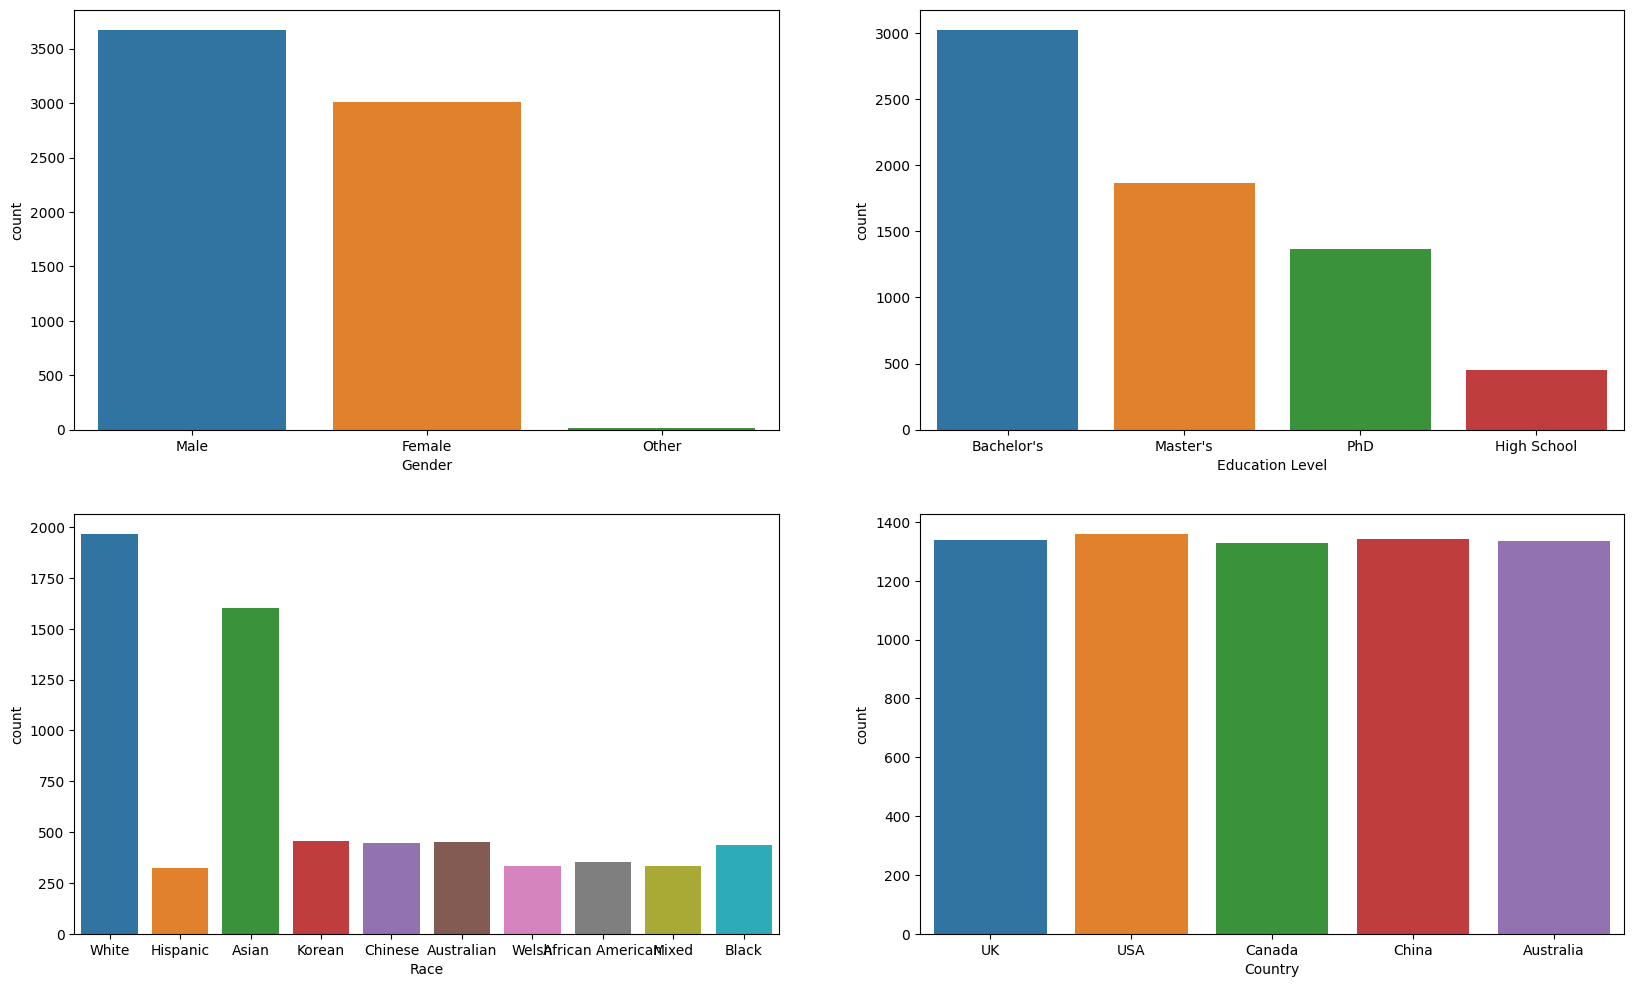

In [170]:
def plot_categorical_data():
    fig,axes =plt.subplots(2,2,figsize = (20,12))

    sns.countplot(ax = axes[0,0], x='Gender',data=df)
    sns.countplot(ax = axes[0,1], x='Education Level',data=df)
    sns.countplot(ax = axes[1,0], x='Race',data=df)
    sns.countplot(ax = axes[1,1], x='Country',data=df)
plot_categorical_data()

In [171]:
df.head(2)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic


In [172]:
soft_eng = df[df['Job Title']=='Software Engineer']

In [173]:
ds = df[df['Job Title']=='Data Scientist']

In [174]:
soft_eng_man = df[df['Job Title']=='Software Engineer Manager']

In [175]:
da = df[df['Job Title']=='Data Analyst']

In [176]:
a_s = df[(df['Job Title']=='Data Analyst') | (df['Job Title']=='Data Scientist')]

In [177]:
s_e = df[(df['Job Title']=='Software Engineer') | (df['Job Title']=='Software Engineer Manager')]

In [178]:
s_e['Job Title'].value_counts()

Software Engineer            518
Software Engineer Manager    376
Name: Job Title, dtype: int64

In [179]:
a_s['Job Title'].value_counts()

Data Scientist    453
Data Analyst      363
Name: Job Title, dtype: int64

In [180]:
df['Job Title'].value_counts()

Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Supply Chain Analyst            1
Name: Job Title, Length: 193, dtype: int64

In [181]:
df['Country'].value_counts()

USA          1360
China        1343
UK           1337
Australia    1336
Canada       1328
Name: Country, dtype: int64

In [182]:

fig = px.box(data_frame=df, x='Gender', y='Salary')
fig.show()

In [183]:
fig = px.box(data_frame=df, x='Education Level', y='Salary')
fig.show()

#### Data analyst vs Data Science


In [184]:
da.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
81,81,41.0,Female,Master's,Data Analyst,13.0,80000.0,USA,White
378,378,27.0,Female,Bachelor's,Data Analyst,2.0,110000.0,UK,Mixed
382,382,25.0,Female,Master's,Data Analyst,1.0,100000.0,China,White
386,386,30.0,Female,Bachelor's,Data Analyst,5.0,145000.0,USA,African American


Text(0.5, 1.0, 'Salary Distribution by Gender')

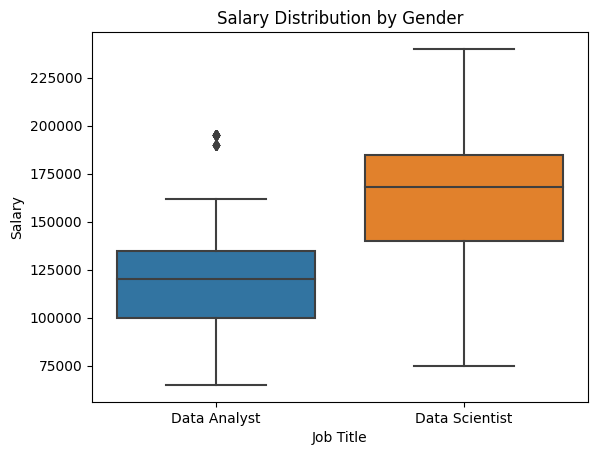

In [185]:
sns.boxplot(data=a_s, x='Job Title', y='Salary')
plt.title('Salary Distribution by Gender')

Text(0.5, 1.0, 'Pendidikan Data Analyst')

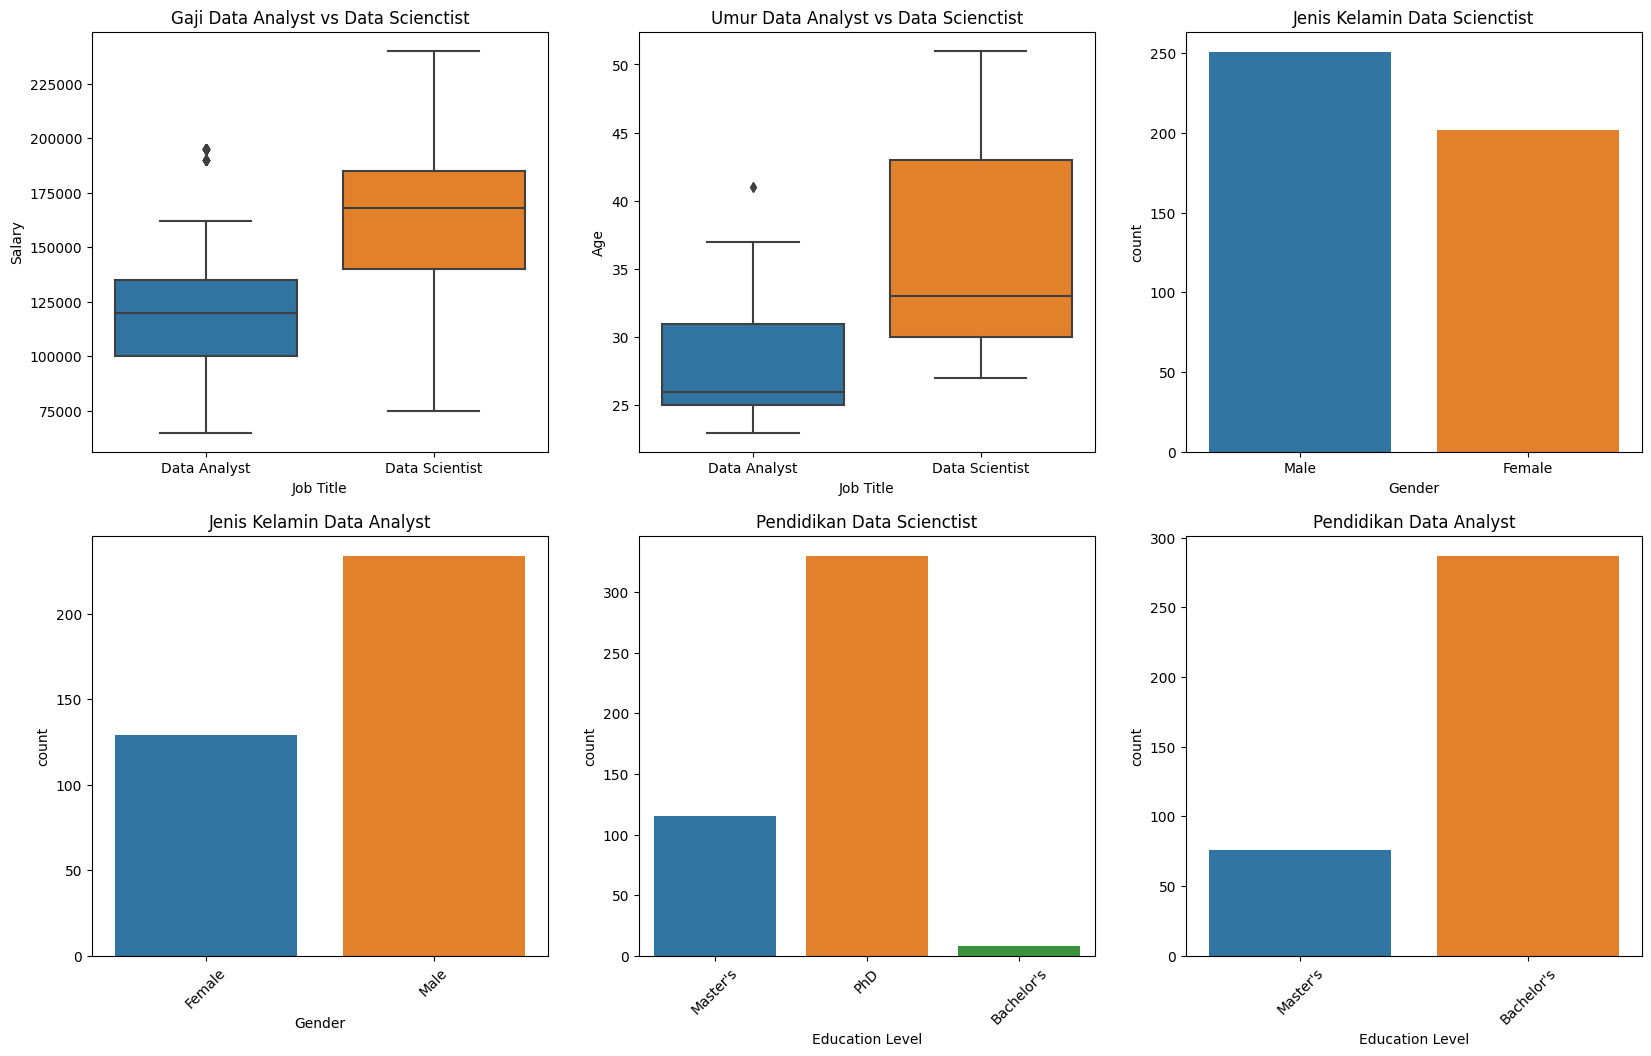

In [186]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
sns.boxplot(data=a_s, x='Job Title', y='Salary')
plt.title('Gaji Data Analyst vs Data Scienctist')

plt.subplot(2, 3, 2)
sns.boxplot(data=a_s, x='Job Title', y='Age')

plt.title('Umur Data Analyst vs Data Scienctist')

# Salary distribution with respect to Race
plt.subplot(2, 3, 3)
sns.countplot(data=ds, x='Gender')

plt.title('Jenis Kelamin Data Scienctist')

plt.subplot(2, 3, 4)
sns.countplot(data=da, x='Gender')
plt.xticks(rotation=45)
plt.title('Jenis Kelamin Data Analyst')

plt.subplot(2, 3, 5)
sns.countplot(data=ds, x='Education Level')
plt.xticks(rotation=45)
plt.title('Pendidikan Data Scienctist')

plt.subplot(2, 3, 6)
sns.countplot(data=da, x='Education Level')
plt.xticks(rotation=45)
plt.title('Pendidikan Data Analyst')



#### Software Enginner vs Software Engineer Manager

In [187]:
df['Education Level'].value_counts()

Bachelor's     3023
Master's       1861
PhD            1369
High School     448
Name: Education Level, dtype: int64

In [188]:
soft_eng['Education Level'].value_counts()

Bachelor's    478
Master's       40
Name: Education Level, dtype: int64

Text(0.5, 1.0, 'Pendidikan Software Enginner Manager')

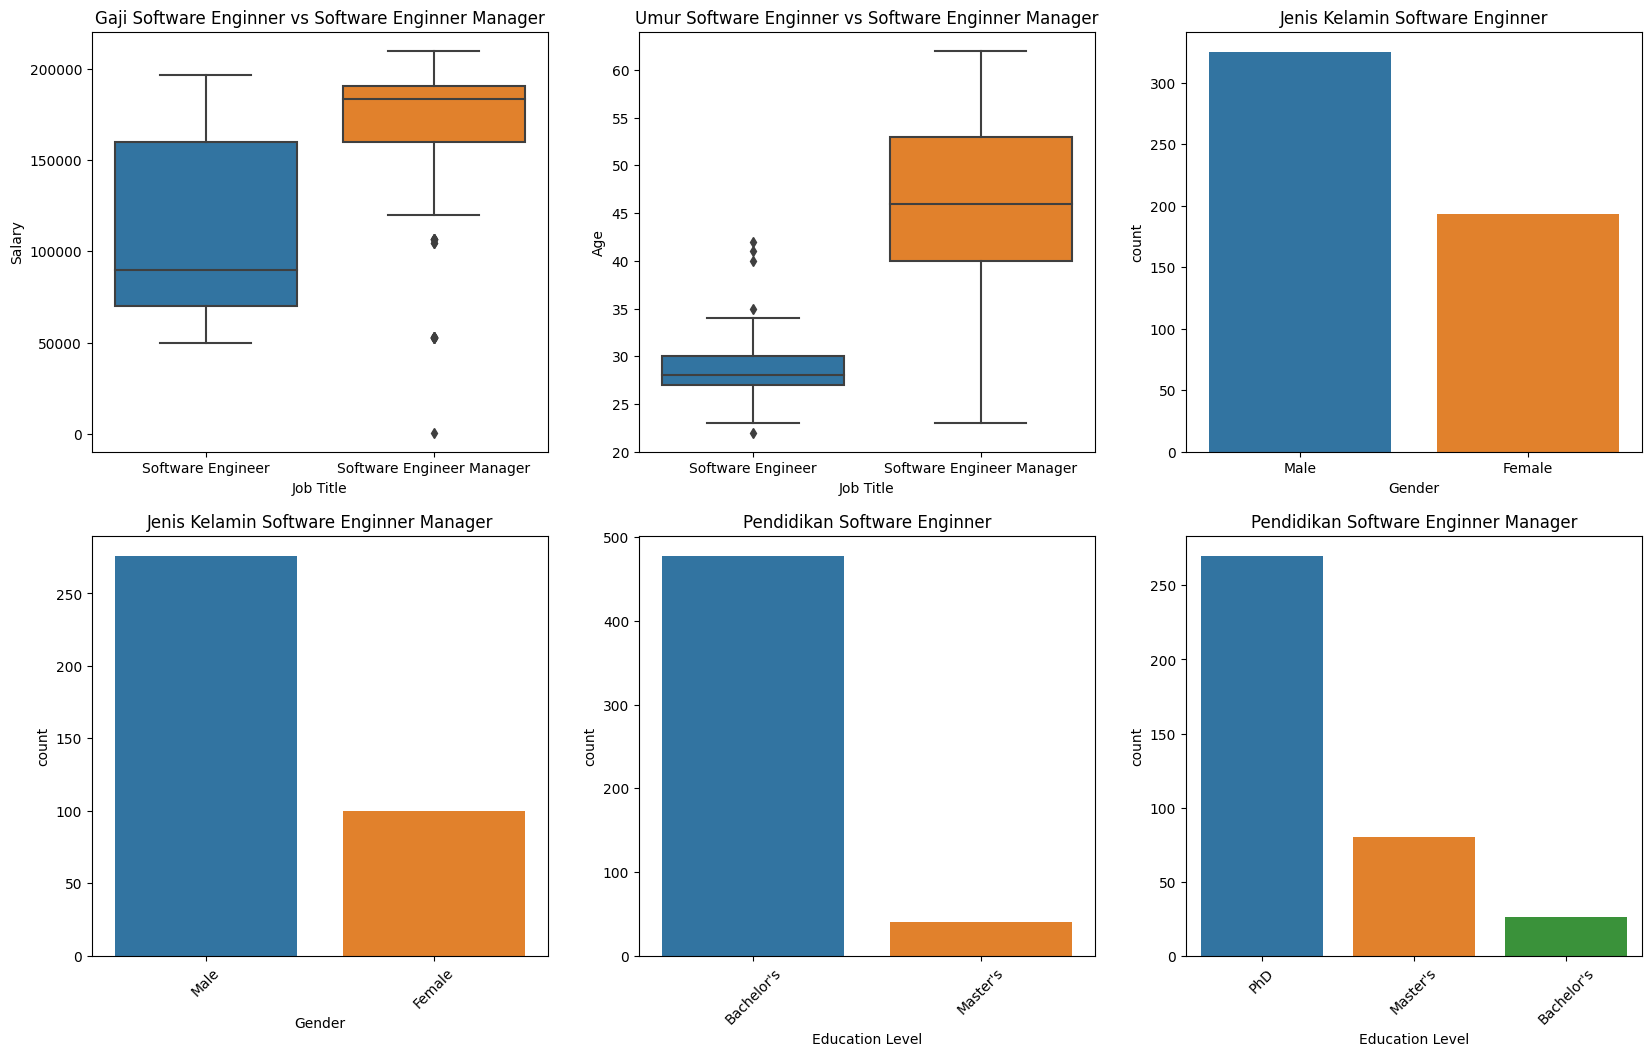

In [189]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
sns.boxplot(data=s_e, x='Job Title', y='Salary')
plt.title('Gaji Software Enginner vs Software Enginner Manager')

plt.subplot(2, 3, 2)
sns.boxplot(data=s_e, x='Job Title', y='Age')

plt.title('Umur Software Enginner vs Software Enginner Manager')

# Salary distribution with respect to Race
plt.subplot(2, 3, 3)
sns.countplot(data=soft_eng, x='Gender')

plt.title('Jenis Kelamin Software Enginner')

plt.subplot(2, 3, 4)
sns.countplot(data=soft_eng_man, x='Gender')
plt.xticks(rotation=45)
plt.title('Jenis Kelamin Software Enginner Manager')

plt.subplot(2, 3, 5)
sns.countplot(data=soft_eng, x='Education Level')
plt.xticks(rotation=45)
plt.title('Pendidikan Software Enginner')

plt.subplot(2, 3, 6)
sns.countplot(data=soft_eng_man, x='Education Level')
plt.xticks(rotation=45)
plt.title('Pendidikan Software Enginner Manager')

## 3. Preprocessing

In [190]:
df.head(2)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic


### 3.1 Handling Missing Value and Outlier

In [191]:
df = df[df['Gender'].isin(['Male', 'Female'])]

In [192]:
df['Gender'].value_counts()

Male      3674
Female    3014
Name: Gender, dtype: int64

In [193]:
df = df.drop(['Unnamed: 0'], axis=1)

Menghapus Gender selain Male dan Female

In [194]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        1
Job Title              0
Years of Experience    1
Salary                 3
Country                0
Race                   0
dtype: int64

In [195]:
df['Education Level'] = df['Education Level'].fillna(df['Education Level'].mode()[0])

mengisi nilai yang kosong dengan modus karena tipe data yang ada adalah kategori

In [196]:
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].median())

In [197]:
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

In [198]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

### 3.1 One Hot Encoding

In [199]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [200]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

In [201]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Education Level']= label_encoder.fit_transform(df['Education Level'])
#df['Job Title']= label_encoder.fit_transform(df['Job Title'])
df['Country']= label_encoder.fit_transform(df['Country'])
df['Race']= label_encoder.fit_transform(df['Race'])

In [202]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,1,0,Software Engineer,5.0,90000.0,3,9
1,28.0,0,2,Data Analyst,3.0,65000.0,4,5
2,45.0,1,3,Senior Manager,15.0,150000.0,1,9
3,36.0,0,0,Sales Associate,7.0,60000.0,4,5
4,52.0,1,2,Director,20.0,200000.0,4,1


### 3.2 Feature Selection

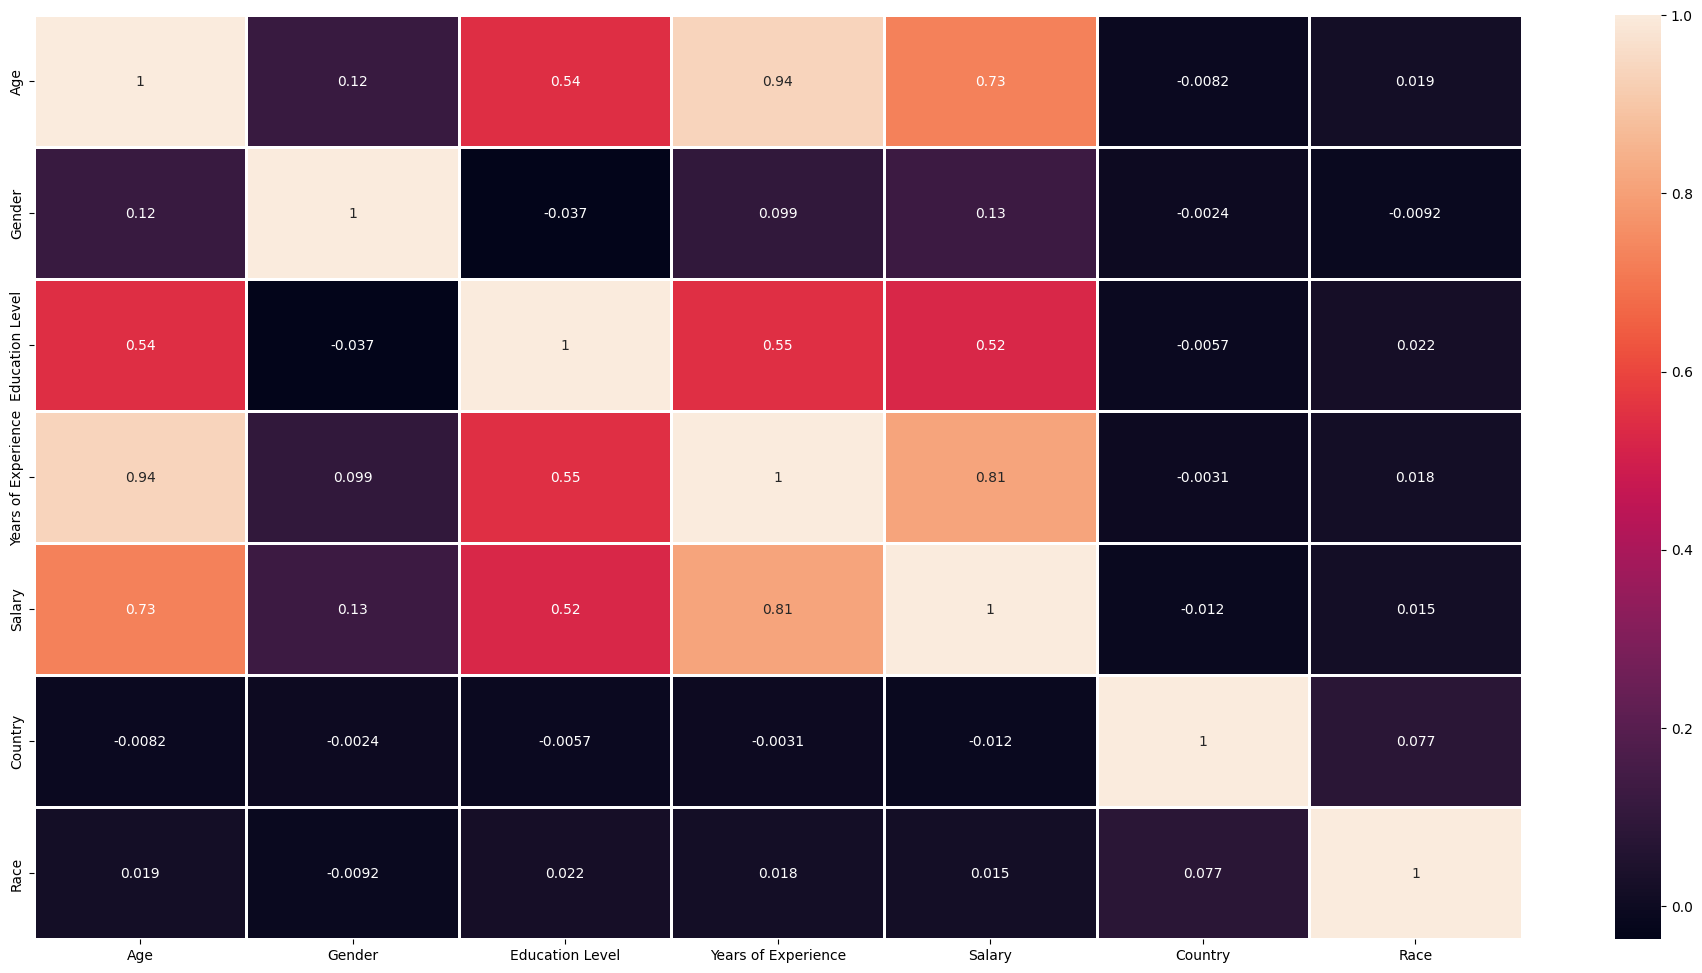

In [203]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [204]:
df = df.drop(['Job Title'], axis=1)

In [205]:
df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Country,Race
0,32.0,1,0,5.0,90000.0,3,9
1,28.0,0,2,3.0,65000.0,4,5
2,45.0,1,3,15.0,150000.0,1,9
3,36.0,0,0,7.0,60000.0,4,5
4,52.0,1,2,20.0,200000.0,4,1


In [206]:
X = df.loc[:, df.columns != 'Salary']
y = df['Salary']

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

## 4. Modeling


### 4.1 linear regression

In [208]:
from sklearn import linear_model, metrics

In [209]:
 # create linear regression object
reg = linear_model.LinearRegression()

In [210]:
reg.fit(X_train, y_train)

LinearRegression()

### 4.2  lasso


In [211]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)

# Melatih model
lasso.fit(X_train, y_train)



Lasso(alpha=0.1)

### 4.3 ridge

In [212]:
from sklearn.linear_model import Ridge

# Membuat objek model regresi Ridge
ridge = Ridge(alpha=0.5)

# Melatih model
ridge.fit(X_train, y_train)


Ridge(alpha=0.5)

### 4.4 random forest

In [213]:
from sklearn.ensemble import RandomForestRegressor

# Membuat objek model Random Forest Regressor
rfg = RandomForestRegressor(n_estimators=100)

# Melatih model
rfg.fit(X_train, y_train)

RandomForestRegressor()


### 4.5 GradientBoostingRegressor





In [214]:
from sklearn.ensemble import GradientBoostingRegressor

# Membuat objek model Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=300)

# Melatih model
gbr.fit(X_train, y_train)

#

GradientBoostingRegressor(n_estimators=300)

### 4.6 Support Vector Reg

In [215]:
from sklearn.svm import SVR

# Membuat objek model Support Vector Regressor
model = SVR(kernel='linear')

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi
svr = model.predict(X_test)

## 5. Evaluation

In [216]:
y_pred = reg.predict(X_test)
lasso = lasso.predict(X_test)
ridge = ridge.predict(X_test)
rfg = rfg.predict(X_test)
gbr = gbr.predict(X_test)

### 5.1 Mean Absolute Error

In [217]:
from sklearn.metrics import mean_absolute_error
print("--------------Linear Regression---------------")
mean_absolute_error(y_test, y_pred)





--------------Linear Regression---------------


23426.50381166919

In [218]:
print("--------------lasso Regression---------------")
mean_absolute_error(y_test, lasso)

--------------lasso Regression---------------


23426.527846598266

In [219]:
print("--------------ridge Regression---------------")
mean_absolute_error(y_test, ridge)

--------------ridge Regression---------------


23426.644199402486

In [220]:
print("--------------rfg Regression---------------")
mean_absolute_error(y_test, rfg)

--------------rfg Regression---------------


9809.165966639568

In [221]:
print("--------------gbr Regression---------------")
mean_absolute_error(y_test, gbr)

--------------gbr Regression---------------


14188.467236144532

In [222]:
print("--------------svr Regression---------------")
mean_absolute_error(y_test, svr)

--------------svr Regression---------------


24967.535562854788